In [2]:
import numpy as np
from tqdm import tqdm

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%cd C:\Users\praga\Downloads\PRML\Assign2

C:\Users\praga\Downloads\PRML\Assign2


In [5]:
traindf=pd.read_csv('A2Q2Data_train.csv',header=None)

In [6]:
testdf=pd.read_csv('A2Q2Data_test.csv',header=None)

In [7]:
train=traindf.to_numpy()

In [8]:
test=testdf.to_numpy()

In [9]:
y=train[:,-1]

In [10]:
X=train[:,:-1].T
mu=np.mean(X,axis=1)
means=np.array([mu for i in range(np.shape(X)[1])])
Xd=X

# 2)i) Analytical Solution


In [11]:
A=np.matmul(Xd,Xd.T)

In [12]:
B=np.linalg.pinv(A)

In [13]:
w_star=np.matmul(B,np.matmul(Xd,y)) 

## 2)ii)  Gradient Descent

In [18]:
wgrad=np.asarray([0. for i in range(len(Xd))])
perform=[]
alpha=0.02
neta=alpha/len(y)
nonconv=1
perform.append(np.linalg.norm(w_star-wgrad))

while nonconv:
    wlast=wgrad.copy()
    grad=neta*(2*np.dot(np.matmul(Xd,Xd.T),wlast)-2*np.matmul(Xd,y))
    wgrad=wlast-grad
    perform.append(np.linalg.norm(w_star-wgrad))
    if np.linalg.norm(grad)<1e-10:
        nonconv=0

In [19]:
import matplotlib.pyplot as plt

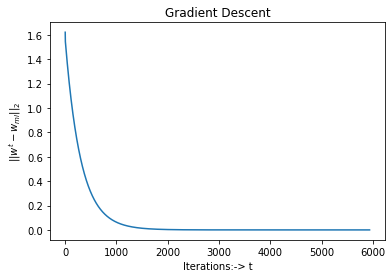

In [20]:

plt.plot(perform)
plt.title('Gradient Descent')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'$||w^{t} - w_{ml}||_{2}$')
plt.show()

In [28]:
err_mi=0
err_u=0
for i in range(len(y)):
    err_mi+=(np.matmul(Xd.T[i],w_star)-y[i])**2
    err_u+=(np.matmul(Xd.T[i],wgrad)-y[i])**2
print('Error of Wml:',err_mi,'Error of Wgrad:',err_u)

Error of Wml: 396.86441862725127 Error of Wgrad: 396.8726485233299


In [29]:
err_mi<err_u

True

## 2)iii)  Stochastic Gradient Descent

In [58]:
wsgd=np.asarray([0. for i in range(len(X))])
performsgd=[]
performwavg=[]
ws=[]
alpha=0.2
neta=alpha/len(y)
nonconv=1
while nonconv:

    idxs=np.random.choice(len(y),100,replace=False)
    Xsgd=X[:,idxs]
    ysgd=y[idxs]
    
    wlast=wsgd.copy()
    grad=neta*(2*np.dot(np.matmul(Xsgd,Xsgd.T),wlast)-2*np.matmul(Xsgd,ysgd))
    wsgd=wlast-grad
    ws.append(wsgd)

    wavg=np.mean(ws,axis=0)
    performsgd.append(np.linalg.norm(w_star-wsgd))
    performwavg.append(np.linalg.norm(w_star-wavg))
    if performsgd[-1]<0.03:
        nonconv=0
    print(performsgd[-1])

1.6093983641614023
1.59943041712847
1.5909378855242249
1.584178638532936
1.5789949105132746
1.5740450042069773
1.5706024819003017
1.567647998976646
1.5646876675096761
1.562563869748683
1.5606443314062461
1.5589958482149748
1.5574627627114843
1.556320875967081
1.5552788511696816
1.5543857256563152
1.5535062461633637
1.5526286424340596
1.5518046625555857
1.5511572873019985
1.550581426053912
1.550055333360116
1.5494751302658225
1.5488235699604787
1.5481375624760711
1.5475350260433944
1.5469803313142796
1.5465299327039976
1.5459218096560208
1.5454961179004385
1.5448477743203177
1.5443093301145125
1.5438072457246734
1.5433738903392402
1.5430304596936828
1.5426070536996794
1.542030045242445
1.5415272440165806
1.541072231934347
1.5404481900517113
1.5399135879406174
1.539417308021264
1.5389498220881215
1.5384296224939296
1.537943412466434
1.5375483675851551
1.5370442216654259
1.5365370300367414
1.5360142572551032
1.5355244630398492
1.5350205476759655
1.5343764144802081
1.5337343126656202
1.533

1.3411756648369606
1.3407417119607326
1.3402610066112137
1.3398104121956569
1.3394681252008458
1.339105375651793
1.3386912085090377
1.3382705353958875
1.3378753086683024
1.3373197466957787
1.3369079218823727
1.3365428289888015
1.3360512494412653
1.3356689971301325
1.3351845504887028
1.3347381357519712
1.3342334812944376
1.3338356353324587
1.333439156267834
1.3329651514682743
1.332568277829069
1.332109464001241
1.3317503226134253
1.3313051408876455
1.3308425624758045
1.33037657394508
1.329966203180033
1.3295923938729564
1.3291738430571314
1.3287940379549679
1.328424949491143
1.327901368746159
1.3275030911251813
1.327106743192282
1.3266302207883858
1.3261519286981105
1.3257470471151689
1.325283030038812
1.324884566715556
1.3242868512821704
1.3238081150523404
1.3231671128305145
1.3227572265346512
1.3222922696566748
1.3219274042547504
1.321475571928565
1.3211406697618548
1.320750227365993
1.3203005842865905
1.3199061418071962
1.3193267048052832
1.3188813074122845
1.3183442629641076
1.31796

1.1422395533597849
1.1417786428378331
1.1414396245260074
1.1410700254713537
1.1407252093548914
1.1403391336234399
1.1400062899549719
1.1396960853360265
1.1393336022199774
1.1389162381555051
1.1385018274505554
1.1382037654761568
1.1378363329139831
1.1375372611886583
1.1371150961831933
1.1367536876183295
1.1364016361997047
1.1360147203089752
1.1356605726114415
1.1352580428432726
1.1348897816451258
1.134510284581812
1.1340074359761272
1.1336362797836512
1.1332762208123162
1.1328648320699506
1.1325313760048
1.1321482337203341
1.1317580216758087
1.13134994237748
1.1310515373932761
1.1307221799884744
1.1302960512453308
1.1299091303028521
1.129558960995527
1.12921468508846
1.1288079928010557
1.1283735257035903
1.1278795203505239
1.1276067984477043
1.1273143989825085
1.1269178085275657
1.1265132176448116
1.126207910665551
1.1257129242020387
1.1252524078181683
1.1249121463075373
1.1245677048024783
1.1242331412796416
1.12390928231614
1.1236085419056268
1.1232634828130827
1.1228024792858295
1.122

0.9667973801565682
0.9664807215579095
0.9662274365923437
0.9659607191235072
0.965670333361378
0.9652976247552849
0.9650761594977748
0.9648712793481841
0.9645028669990312
0.9642173606682808
0.9640121838013411
0.9637205718254321
0.9634001402553699
0.963113104462568
0.9627840853238984
0.9624340581330988
0.9621727562343627
0.9618628349686422
0.9614914883754209
0.9612197256475529
0.9609129329785074
0.9606360318725738
0.9603388279585358
0.9600646776312467
0.9597613748006174
0.9595278143716098
0.9591924815402427
0.9588971452500585
0.9585786956473213
0.9582819912579156
0.957929728643841
0.9576411507466477
0.9573699981599039
0.9570633088339552
0.9567723437386886
0.9564571111125763
0.9561448401694315
0.9557787488515779
0.9555276201911117
0.95520791704072
0.9549492753379336
0.9546421011221636
0.9542395154046865
0.9538388369680775
0.9535682809581891
0.9531737887716799
0.9527849188085987
0.9524277956418246
0.9521166668980864
0.9518285019919164
0.9515160382306084
0.9512351642322079
0.951014130812718

0.8331353615029252
0.832913203985975
0.8326586657151447
0.8324012537249674
0.8322189900506316
0.8319823482579553
0.8316251123390134
0.8314050997100303
0.8311232772700815
0.8308991329897313
0.8305869595133797
0.8303447092440693
0.8300944830941295
0.8298355703397959
0.8295218078469576
0.8292685905845519
0.8290090463654571
0.828765817517135
0.8285048021875813
0.828194589322456
0.8279113404006314
0.8276664677394655
0.8273354467118685
0.8271051259094437
0.8268730802222104
0.826597904512091
0.8263093399599748
0.8260730812404545
0.8257836026111153
0.8255559771211897
0.8251780951884654
0.8249399454153826
0.8247092989048462
0.8245114389202227
0.8242795019952042
0.8240175253132953
0.823719592970375
0.8234553769596228
0.8232248501064564
0.8229508344669502
0.8226079485605361
0.8223187891912149
0.8219772471143821
0.8216320477518705
0.8214074350978
0.8211370640764912
0.820787847165275
0.8205040202811024
0.8202090507483742
0.8199656040307655
0.819694543670008
0.8194311293821603
0.8190777318006901
0.8

0.7195334098498867
0.7193229279017923
0.7191347362739892
0.7189456055093352
0.7187274348411636
0.7184485612267797
0.7182034768566196
0.7179237042320836
0.7177158462447191
0.7174958426216236
0.7172960520447303
0.7170366170354949
0.7168765532093478
0.7167019099700108
0.7164375998413824
0.7161695843028539
0.7159273082665311
0.7156941734456501
0.715454893362944
0.715283184166312
0.7150646962111243
0.7148099499963886
0.7145432630352648
0.7142595109041048
0.7140673140034687
0.7138543006922479
0.7136858904136706
0.7135100519798765
0.7133263255097977
0.7131052499708075
0.7128684912229227
0.7126561714248055
0.7124066957330202
0.7122089241901609
0.7119713373791489
0.7117196797691867
0.711505313911861
0.7112617658904923
0.7110704435965224
0.7108689936468428
0.7106002092459266
0.7103083269777123
0.7100089068730078
0.7098545814257705
0.7096746847036565
0.709456628240967
0.7091835642846672
0.7089543156832585
0.7087790290386834
0.708527933023707
0.7082633665105716
0.70802703898947
0.7077952952329798


0.6202078110836974
0.6200291002359658
0.6198586694017838
0.619658687308937
0.6195083861219769
0.619346082208314
0.619115356252901
0.6188827699339119
0.6186798323103094
0.6184334505480084
0.6181865412759353
0.6179728140705547
0.6177119010894835
0.6174614742035771
0.6172898903073637
0.6171012020787131
0.616934724931669
0.6167484492810741
0.6165168005062365
0.6163003912375599
0.6160255208593496
0.6158163488508009
0.6156091380063778
0.6153713822537374
0.61513358013546
0.6149238754475803
0.6147560947095884
0.6145490361158678
0.6143552508811968
0.6141548112540959
0.6139691520063311
0.6137418418265209
0.6135069637217841
0.6132721554492522
0.6130569025630653
0.6128535994641059
0.6126861569338609
0.612409850009299
0.6122571082045795
0.612060587443335
0.6118289915620782
0.6116452120463264
0.6114336222469797
0.6112770724061836
0.6110299781166213
0.6107817718797762
0.6105931331514691
0.6103901945596333
0.6102341556117336
0.610060933079777
0.609814752490238
0.6096377972677968
0.6093966397986914
0.6

0.533322893209853
0.53312207997611
0.5329408286262108
0.5327644872684464
0.5325822117368512
0.5324457329097649
0.5322802553979866
0.5321100434722802
0.5319064130282988
0.531727205569568
0.5315849123265556
0.5314246145210858
0.5312105306520223
0.5310885634532277
0.5309279488462828
0.5307355168081985
0.5305225531821042
0.5303932013652813
0.5302416533636828
0.5300980018732823
0.5299795576144913
0.5298046820338546
0.5296213111838126
0.5294516036223456
0.5293081615087856
0.5291008343421503
0.5289311915340511
0.5287258983551232
0.5286363687437061
0.5284573087198966
0.5282759079982983
0.5280978579939437
0.5279469107329616
0.5277853253841487
0.5275836952448112
0.5274382999668484
0.5273187868426935
0.5271615884513976
0.5269979633703695
0.5267665736027642
0.5265876174953602
0.5264452087812529
0.5262459912606754
0.5260901778881889
0.52594639832056
0.5257824979846393
0.5256499791869619
0.5254412075633159
0.525301381718743
0.5251305489512906
0.5249807148159782
0.5248020020346833
0.5246270129131747


0.46396765461787987
0.4638305373435463
0.46369829929379247
0.4634967299331392
0.4633432851440402
0.46325057906581824
0.46304649437761025
0.4628850760069081
0.4626866675270273
0.4625589700086857
0.4624560298532372
0.46235825176283285
0.46217166098231266
0.46206588199791393
0.46193028153882754
0.46179637729265466
0.46171111222094446
0.46156412851301426
0.4613626578353195
0.4612269040892791
0.46108223146493554
0.4609830054649771
0.4608464544882913
0.4606908205252038
0.4604869242778866
0.4603028045071966
0.4601390475493812
0.4600212630446546
0.4598869475147006
0.45975559749324113
0.4595834032347591
0.4594617837220375
0.45932873860024226
0.45915479324852276
0.45896885357032013
0.4588071056479922
0.45871675802040035
0.45859618439140004
0.4584656895028837
0.45833770330208273
0.45821910583625225
0.4581124835571173
0.45797248878784275
0.45779052042970036
0.4576317366148852
0.45746962307915895
0.4573071983448065
0.457161724351163
0.45704417124338853
0.4569095937873856
0.4567909553574155
0.456662

0.40366234402312584
0.40355207276285027
0.40343728598955053
0.40333212958339903
0.40319743428237576
0.4030791018469397
0.40299246638183805
0.4028589679598222
0.4027401029121537
0.40260563611845973
0.40248602390824795
0.40233016046547215
0.4021944575465924
0.4020702512549151
0.40188551350439
0.4017443190493607
0.4015653162137675
0.4014521724739658
0.4013203379078389
0.4011219838794367
0.40096963283875275
0.40082372900992475
0.40072327854864787
0.40059558642860266
0.40048518927036053
0.4003247200089625
0.40023668617491726
0.4000927188221482
0.3999770828760147
0.39984443588767155
0.39970629431388294
0.3996086047377018
0.3994763848535326
0.39935055376674167
0.399228584560952
0.39909643052603216
0.3989664622023683
0.39883251736959774
0.3987053659160917
0.39859696649183096
0.39843473021043435
0.39829175471784123
0.3981641790273841
0.39799554870169584
0.3978437704709633
0.3977474882303378
0.39764992657157555
0.39759504648583466
0.39743263693077385
0.3973092183744716
0.39713880545937064
0.3970

0.3527071412536163
0.35259088515900733
0.35245910771162914
0.35234484206682387
0.3522712631778279
0.35216925946246164
0.35207137676824657
0.3519516077838282
0.3518234207619297
0.3516747330849535
0.3515444873446114
0.3514447130981741
0.3513229340793002
0.3512469428167096
0.3511222643264753
0.3509882251921074
0.3509215584038666
0.3508189075302037
0.3507162652686716
0.35062190904078094
0.3505064214125966
0.35031699364175434
0.3502447547273386
0.3501352469079848
0.35005115165451267
0.3499759179793111
0.3498723782665691
0.3497671129730164
0.34961554722160076
0.3495164666480502
0.34942140333475386
0.3492924242826843
0.3492245721574966
0.3491138381685272
0.34902612076494727
0.3489082448677119
0.34882091933847587
0.3486983831081666
0.3485610635668898
0.3484484756516151
0.3483008162535726
0.3481969581133961
0.34806307536529285
0.347947423580279
0.34782881521091585
0.347718766489641
0.347569508386623
0.3474782933738737
0.3473665733879116
0.34725174268677567
0.34714275082221585
0.3470283309479184

0.30742101046363923
0.3073192584337584
0.3072427324829486
0.3070946642047235
0.30699476807447645
0.3068708169735421
0.30677006811751967
0.3066966883335668
0.30662266154360274
0.30654395029716536
0.3064415250987634
0.3063270740509481
0.3062448644539493
0.30611804566671635
0.30605474007466493
0.30597312177013847
0.3058430992334077
0.30580745867175907
0.3056827693528976
0.3056038913348961
0.30551470998411073
0.30541245142592577
0.30530329404861
0.30520204244585936
0.30511951598399584
0.30502379160106496
0.3049296510453595
0.3048329371688624
0.30473763736641907
0.3046312605542046
0.30446745975440703
0.3043806513628652
0.30426896915592216
0.3041703611903121
0.3040723946722967
0.3040223364630471
0.3038944787120989
0.30377663864736343
0.3036669678860794
0.3035824108143712
0.3034733475881836
0.30335482864771784
0.30317318651083364
0.3030996665808491
0.30300926795725874
0.3028896332838739
0.3028011160854492
0.30275741230066694
0.30267796390898555
0.3025834070214997
0.302484027079865
0.302384408

0.26812808821047784
0.2680435203710307
0.2679892524106641
0.26790065720471434
0.26783940015642504
0.2677257429656931
0.26764947266223943
0.26752433374173806
0.2674658648653086
0.26737757016842983
0.267290003302951
0.2672606975251519
0.2671516119028638
0.2670541049477221
0.26696643230357514
0.26687176709720534
0.26680213876115855
0.2666809254254267
0.2666313628998786
0.26650898557443814
0.2664522725607356
0.2663750997100613
0.26627165442334727
0.2661736918245119
0.26607404397095713
0.26600108720837706
0.2659098540826033
0.26584158862662066
0.2657969909964847
0.2657178437433369
0.26561106749473834
0.265552740269956
0.26550510502481506
0.26544857025159413
0.2653847886334531
0.2653321566734367
0.2652509017024916
0.2651469297234114
0.26507036835500997
0.26499461815904185
0.2649051582330052
0.26483233896104946
0.26476650227745585
0.26463406698943137
0.2645066709460461
0.26446798515389125
0.26439679191658494
0.2643124473645313
0.26423080866700543
0.2641544640417239
0.26410429594794743
0.26403

0.233048071192332
0.23298866092789544
0.23294307325937327
0.23285069288602478
0.2327879592866713
0.23273271184957695
0.23265522160443114
0.23259527847521566
0.23252608684646284
0.23247033556230268
0.2323568607354902
0.23226901334732883
0.23221230269176857
0.23214861029927603
0.232139567957971
0.23204033803456386
0.23198068307591305
0.23191395879068827
0.2318019529900886
0.23174822914808718
0.23165616175675444
0.23158004036360816
0.23147287667841815
0.23142338461393533
0.2313235381764637
0.23127022368449077
0.23116137525768873
0.23110727612491103
0.23105782126439597
0.23099029268415155
0.23091319357508774
0.23084610109001844
0.2307627422638805
0.23065456077556415
0.23060207204239822
0.23053165078063037
0.2304537733773433
0.23041627060487602
0.23034082081399904
0.23023258902172897
0.23016930098100286
0.23010606430151104
0.2300542117097058
0.22997163197193804
0.22988502658982407
0.2297875015214006
0.22968169567879004
0.22959892126872336
0.2295497879210847
0.2294808281987387
0.229402634155

0.20251188477492083
0.20245288234495526
0.20238172214141512
0.2023263812066327
0.20226363675817155
0.20214309639269237
0.2020987332903163
0.20204640069525745
0.20197712131101733
0.20185813069522154
0.20180698716921078
0.20172115198808757
0.20160985484891036
0.20154837302626905
0.2014845319855079
0.20140510051246507
0.20139828470436505
0.20128697041537533
0.20121338362752592
0.2011203859529069
0.20104928270323497
0.2009895870062674
0.20097116151125122
0.2009325218131396
0.2008757779510345
0.2008333553721407
0.20076723062277288
0.2007163478749667
0.20064350590178504
0.20061174391510914
0.20055966151134869
0.20047738808764584
0.20042997591998754
0.20039530555551144
0.20030943230452464
0.2002557189299235
0.20025118970508105
0.20020773170567896
0.2001747060288824
0.20014972536595108
0.2000781890041429
0.19998400855904538
0.19990112329832269
0.1998535809313855
0.19979192192850403
0.19979807856130882
0.19974783214033287
0.19969368497404755
0.19958739680004398
0.1995438004910268
0.199481530743

0.17664142328526822
0.17654068927436065
0.17651084597312536
0.17646683171212937
0.17639552546845508
0.17635726232143464
0.17626482258719944
0.1762027797552123
0.1761152268258477
0.1760741226264307
0.1760072353948096
0.1759455985007979
0.17587353229509423
0.17581036510406375
0.17576245509577976
0.17571023059304974
0.17569293968931063
0.17562492190777546
0.17557458536749365
0.1755417335358863
0.17552147520008193
0.1754554004563471
0.1753997575348925
0.17532243556548932
0.17527378362925297
0.17517009453415816
0.17508882350131716
0.1750428091393427
0.17497522492369932
0.17492005932428703
0.17488728693613756
0.17485473408220023
0.1748002417504267
0.17475293151384383
0.17470295234781708
0.17468203923223885
0.17463445868411648
0.17454649386537902
0.17450050059202132
0.1744591985680682
0.17439047050186723
0.17439904380077903
0.1743444460022655
0.1743112112208893
0.17429428750376783
0.17427556959249607
0.17419477071637135
0.17418335218137196
0.1740947322914764
0.17407122672182673
0.174043009650

0.15446152317368594
0.15445115936391696
0.15440597950161924
0.1543399269574679
0.15430094421956947
0.1542745905868295
0.1542371413685119
0.15421497993360184
0.1541725755523589
0.15413581408615198
0.15410899177775142
0.1540633124814415
0.15403427323413896
0.15397397013879308
0.15393801742639723
0.1538798740806552
0.15381895717850144
0.15379409197950178
0.15377422973890145
0.1537667080506782
0.15374492129052458
0.15368337222705644
0.15362971421838126
0.15358631938380635
0.1535322529445657
0.15349909845457618
0.15343301352486338
0.15336889752509897
0.15334541461333215
0.15329334090721566
0.15319363305465541
0.15312632032653808
0.15306224634708337
0.1530371745983014
0.15301696294444506
0.15294907742677621
0.1529462563349071
0.15288535355666416
0.15282030487770085
0.15276275302383904
0.1527448547533733
0.15272141309411422
0.15267007162089033
0.15261361786272137
0.152560480663325
0.1524863482856035
0.15241411544492686
0.15234685113225868
0.15231497354177692
0.1522466700713857
0.1521877370444

0.1349573639518501
0.13488593316949318
0.13484754148084455
0.13480491756734486
0.13478619756467816
0.13478012535947434
0.13472719671764605
0.13467217838081746
0.1345877511173127
0.13456598655289004
0.1345241106390335
0.13446438994912457
0.1344281395623829
0.13440183193248054
0.13432133326392268
0.13426684032242947
0.13418965325292118
0.1341742480909806
0.13413410813624443
0.1341239151360781
0.1340830777394723
0.13405623162162184
0.13398704165327607
0.13395619296195885
0.13390951546343527
0.13387278984891757
0.13378039261750074
0.13375514309153183
0.13368339077851282
0.13364404468991867
0.13359661068307366
0.1335110509736348
0.1334387074336891
0.13336403511756023
0.1333314531097253
0.13327949753341298
0.13322945819952067
0.13315081312678
0.1331041747532254
0.1330632123329869
0.1330023317375255
0.13297243084099147
0.13292753244784017
0.13290464867767768
0.1328636633726701
0.13280680609315373
0.13274890623721464
0.13268441986321722
0.13261722759938807
0.13255472171435403
0.132504291162380

0.1178030810337005
0.11778107291084441
0.11776830871397728
0.11772863872337
0.11773318611771007
0.11770023191203004
0.1176557860374656
0.1176567710556588
0.1176352375592648
0.11761373121910652
0.1175936370588527
0.11757969947570635
0.11754049509727395
0.11750756461299929
0.11750456900838367
0.11749383647735255
0.11741403462208751
0.11736421100434541
0.11735594588043413
0.11730080496055878
0.11727386260118203
0.11722691357851421
0.11721689616286646
0.1172070879726543
0.11710174328305066
0.11702336138953251
0.11698160342896735
0.11694017461161786
0.11691152578050107
0.11687952195051309
0.11684846453494561
0.1167700493448338
0.11671706825090974
0.11665026453604177
0.11662967754656478
0.1165672024536014
0.11650126651079744
0.11644783861508815
0.11639957430123515
0.11636344303203446
0.11633334301921067
0.11630298104296362
0.11623976622936985
0.11619897918756003
0.11615978215359214
0.11618675772039677
0.11616992472425779
0.1161566464175079
0.11611455961402355
0.11609553519076041
0.1160338787

0.10365363719904251
0.10363957539371978
0.10359606174098616
0.10354751929625139
0.10349153607552723
0.10343673053242101
0.10339678865129807
0.10336184245947688
0.10333420178924796
0.10328241015373076
0.10325263059455309
0.10322141384484634
0.10319578102324291
0.103150761370661
0.10313606468120548
0.10306167482870346
0.10305942052041908
0.10301242959520887
0.1029722905315734
0.1029634557685946
0.10295512032020039
0.1029139109831026
0.10287123348062968
0.10281187075113973
0.10280600387516156
0.10272913908837897
0.1026717656029151
0.10260229142587807
0.1025701931742936
0.10257682579708291
0.10255195663254472
0.1025026340125133
0.10244020570895665
0.10246369402138839
0.10246156591716928
0.10243039753690263
0.10240787977205185
0.10242049319332168
0.10238297515783423
0.10235441803963062
0.10232108075543966
0.10228018707178936
0.10223822932937292
0.1021914245345004
0.10217888724614425
0.10215704051244476
0.1021175010878349
0.10207717077020659
0.10204114055246613
0.1020379309722348
0.102009351

0.09088423101978838
0.09089196172230896
0.09084113390775213
0.09084112823215144
0.09079508408774234
0.09072979461381916
0.09068882903128446
0.09066896701471662
0.09062237948440417
0.09059799152355143
0.09056967170847077
0.09052960500772174
0.09048690203263361
0.09043883134005228
0.09040760376961288
0.09038247360943732
0.09038707201888764
0.09031753719519998
0.09026673695821463
0.09020984376257156
0.09018379904178979
0.09014983655403694
0.09013501141150708
0.0901288787516333
0.09009354466055433
0.0900762577801533
0.09005440700022765
0.09003213597298369
0.09000192744865788
0.08995864132399002
0.08991902499130174
0.08986460795488473
0.08983039230712703
0.08983825176738483
0.08980104334906257
0.08978400540794282
0.0897801133618048
0.08975133733080187
0.08975071992369175
0.08970798943238122
0.08966163937028172
0.08965056578507925
0.08962475469022754
0.08960115250895354
0.08960727626342606
0.08957255822190756
0.08953428294992886
0.08948459587020015
0.0894788177763098
0.08943371999347746
0.08

0.07922202445032023
0.0792319040385413
0.07921991758439824
0.07916985330125217
0.07915936106220971
0.07912334799028618
0.07911499095247333
0.07906538935647905
0.07907816188666839
0.07904302677715577
0.07902086172218221
0.0789812423801125
0.07895877884596741
0.07895072131966178
0.07888923993214773
0.07885247775112963
0.07887590062426143
0.07886436267483542
0.07887902810273431
0.07886771017770736
0.07880818808739881
0.07876387873643112
0.07876832640873414
0.07875127736409576
0.07876825978541149
0.07872050940180239
0.0786886549645244
0.07866117699237082
0.07867340213796536
0.07865339675238692
0.07865594483958091
0.07867136471003044
0.07866951803316882
0.07860702982972637
0.07857450667066314
0.07857324852544204
0.07857422686411289
0.0785680553290883
0.07853451561997064
0.07850135121374144
0.07849524781546606
0.07850070315840328
0.07847848711069297
0.07848748583030696
0.07845675732395088
0.07840812621460513
0.07840268371210651
0.07837902840702611
0.07838552743305051
0.0783453786373776
0.078

0.06971092103169668
0.06968596463817935
0.06964565034549766
0.06960373323283238
0.06957741623582928
0.06956155801692468
0.06953753252080565
0.0694741376340804
0.06939773893793377
0.06937011842096151
0.06937758224472373
0.06938651385270564
0.0693350175823092
0.06932545212077228
0.06927350844569363
0.06925521956406334
0.06924007978594182
0.0692047261352805
0.06918995950189463
0.06914493271265781
0.0691518755036349
0.06911420864075342
0.06908801685386809
0.06906371570845733
0.06905654790345005
0.06903632575854135
0.06900964741306741
0.06900952104973486
0.06893775948100941
0.06891599217280071
0.06884661938512154
0.06888661442428584
0.06886554305600844
0.06884634552349755
0.06883423597380761
0.06878991871005863
0.06879392326941085
0.06879685892812266
0.06873483003061724
0.06868240028053978
0.0686767762036083
0.06864916234266502
0.06864254528305949
0.06867367554885985
0.06865417256696228
0.06860171531540729
0.06859896824014064
0.06857382394625675
0.0685256463748201
0.06853628649403144
0.0685

0.06162243839691831
0.06156814898579291
0.06158008242813268
0.06152939932885742
0.06153203842186251
0.06153932983477955
0.061518285790213435
0.06149411928586904
0.06147747988840014
0.06141152271420158
0.061421401523930164
0.06136820142305181
0.06136104915793394
0.061333004939043104
0.061277753339981145
0.061239856431622615
0.06124685284326519
0.06127600692328838
0.06125442920451719
0.06127610714113532
0.061241170217975184
0.061247521364044134
0.061243663434352856
0.0612460353917563
0.06116591587281895
0.06115556905682249
0.06113720439103999
0.06111225817854822
0.0610889359343081
0.061047647603219145
0.06104659375442794
0.06103531320082284
0.06102653811250995
0.0609910414850057
0.06096603996609158
0.06093182108312094
0.06093177745710253
0.06088929405243362
0.06086231896017741
0.060871652185553744
0.06087366629042272
0.06084476256164534
0.06079572491766725
0.06075699884818974
0.060748033766836886
0.060745801856977005
0.06070624352263968
0.06071198174700179
0.06069388359694527
0.060656403

0.053872757202434
0.05385089521996166
0.05384179791654518
0.05386255098181977
0.05385529413468604
0.05384222973388759
0.05378976221473303
0.05380679748035659
0.053743806283841816
0.053725951972182474
0.05368286207112984
0.053690771108004715
0.05370612540060815
0.05371960112245295
0.05366735601276035
0.05363847344392604
0.05361678161459937
0.05358871628064548
0.053549696155607646
0.05350853664155173
0.053473621968518285
0.05344318948909724
0.05342443926268533
0.05338243127846781
0.05337782139345105
0.05329051951250529
0.053226238434215624
0.05321389472437305
0.05321693293905715
0.05322549992213161
0.053207937624968484
0.053179919670885985
0.05318310070674167
0.0531409789814836
0.05312157535953463
0.05309365931445609
0.05309718477984197
0.05312537571827518
0.0531245095318354
0.053102103170528346
0.05311387430180416
0.05311936107428667
0.05303496855179286
0.053049217465046435
0.05304996247388657
0.05305023281544681
0.05307130080858531
0.0530493143238238
0.05306551341134525
0.0530568149645

0.047226777137587675
0.04717081717241646
0.047230802005207816
0.04721245919862018
0.047259886431442924
0.04723352253295859
0.0472391818475403
0.04724295242540862
0.04724065349551405
0.04722516225905126
0.04719136716129342
0.047173884896000315
0.04715913239970624
0.04714212468949652
0.04710076456614928
0.047059499692766474
0.04703922856792314
0.046986426662586595
0.046982499698980204
0.046970076916562145
0.0469868935838679
0.046954969315023264
0.046939480973504005
0.04692818554352246
0.046894644927893324
0.04686131431193106
0.04683358010174286
0.046796716500770455
0.04677787627401228
0.04675351083201395
0.04673956708012943
0.04675354042007076
0.046747857019050744
0.04674539630234193
0.04678547250354818
0.046777545148370195
0.046756240425002676
0.04673052244910766
0.04673017099740364
0.0467056675269187
0.046669874981055334
0.04665388210201029
0.04659757385138965
0.04660025184819635
0.0465838164681862
0.0465711641977356
0.04660264862738703
0.04659178428950184
0.046592109274104544
0.046575

0.041271521184814024
0.04120925744080571
0.04118214415722753
0.04115240055857771
0.04115165522189878
0.041159527885400074
0.041152953462979494
0.04116963988993724
0.04112857763040974
0.04112643655836615
0.041127800039257194
0.04111930115756852
0.04111333325290237
0.04110224927280971
0.041051242163998025
0.040996160525489565
0.04098502663836028
0.0409857143651101
0.04097609846808074
0.04095884495873003
0.040948019577436344
0.04094066389934881
0.04091938913165475
0.04090336556708291
0.040867427400755815
0.040828005702044534
0.04079738131346166
0.04076542632675513
0.04072609451727022
0.04073824287940047
0.040735920609526424
0.04068964282004001
0.04066102859846957
0.04062896471067804
0.04060838398314379
0.04055289074902459
0.04050482901509911
0.04051560360915174
0.04051352122101887
0.04054176099682935
0.04049717430594085
0.04052749055459557
0.040506311519667854
0.040475306722145596
0.04044218466500234
0.04038501015535778
0.040368923233756994
0.040393280424476624
0.04037792204684244
0.04036

0.03672706704077025
0.03673464202620324
0.03672644862083963
0.03666524957264659
0.0366684160012253
0.036651263556651124
0.036647506373211514
0.036642698858011406
0.036608607894175235
0.03655498751189425
0.03655808623659473
0.03653212786398359
0.03654417788316069
0.03655557603178393
0.036546616709369525
0.03655579774948662
0.03651677324938436
0.03653645932449854
0.036535437719377804
0.03652294130910243
0.03648420818855825
0.03647115113566712
0.03646187370216319
0.036465650872242364
0.03646777793982088
0.036449224437129085
0.03645467254464625
0.036410368423861014
0.036413874815419064
0.03640555251312272
0.03640222313652518
0.036409589753562725
0.036361590501519644
0.03637313412810024
0.03639784185930006
0.03639455220469857
0.03635027523222491
0.03640585606344883
0.03639619014957125
0.036372777288761295
0.036336944338372215
0.036350870821861246
0.036376498729326724
0.036364164785572736
0.03639419301580561
0.03638353688447862
0.036368605643547866
0.03640235475928956
0.03639500016553165
0.0

0.03268821442153972
0.032687310069684096
0.03273317461228266
0.03276386540546057
0.03273834654092598
0.032720092311991085
0.03269193507758983
0.03272588081149529
0.032743941306379525
0.03272875250000274
0.032723553208115465
0.032713589532672824
0.0327435395158217
0.032738411431566715
0.032713397319855106
0.03267874649601551
0.032674365329108015
0.03267470624199655
0.03266414692156348
0.03266155607613986
0.03266338285772321
0.03262341863805748
0.03264583901758953
0.03264907688105672
0.03258273989083702
0.03255565125250924
0.03254907778918702
0.03253564185793476
0.032552765356619745
0.03252621401350314
0.03245122376720836
0.03242735354954224
0.032422190473347066
0.03244219194351823
0.0324081199119462
0.03240014304043189
0.03239121401914512
0.03239933766577618
0.032383657033711086
0.03242341231349509
0.03242535037010319
0.03238973591925034
0.032329176407579104
0.032327185734289984
0.032310467080736156
0.03227665817642653
0.032268933546429096
0.03223963775521105
0.03224674511350003
0.03227

In [59]:
performwavg

[1.6093983641614023,
 1.6042943245530044,
 1.5996287599962795,
 1.5954821297503,
 1.5918668527091604,
 1.5885378705136097,
 1.5856117072051432,
 1.582998244835503,
 1.5805835490986078,
 1.578408830224564,
 1.5764234308183567,
 1.5746140885122322,
 1.5729538399960823,
 1.5714400889556888,
 1.5700536879026952,
 1.5687876498700395,
 1.5676202345386219,
 1.5665307921229468,
 1.5655113271075154,
 1.5645633107801582,
 1.5636845370090178,
 1.5628706938727068,
 1.562104520489838,
 1.5613796938698268,
 1.560687924231782,
 1.560028501069283,
 1.5593990829874937,
 1.558802462134385,
 1.5582283154573313,
 1.5576800849503718,
 1.5571529005755578,
 1.5566444016544625,
 1.5561532359998422,
 1.5556799977422264,
 1.5552275773630093,
 1.5547928720597435,
 1.554369920900747,
 1.5539576523840566,
 1.5535583301664297,
 1.5531660416191369,
 1.5527808233752105,
 1.5524037760950056,
 1.5520367077736956,
 1.5516744088466496,
 1.5513197210708276,
 1.5509741978937335,
 1.5506333979736993,
 1.5502983559720414,
 1

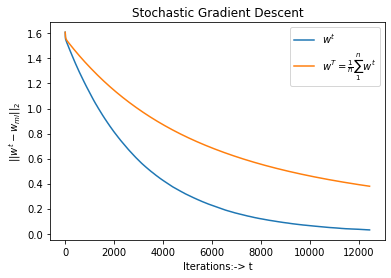

In [93]:
plt.plot(performsgd)
plt.plot(performwavg)
plt.title('Stochastic Gradient Descent')
plt.xlabel('Iterations:-> t')
plt.ylabel(r'$||w^{t} - w_{ml}||_{2}$')
plt.legend([r'$w^{t}$',r'$w^{T}= \frac{1}{n} \sum_{1}^{n}w^{t}$'])
plt.show()

# 2)iv)

In [61]:

def cv_train_split(kfold,nums,dataset,y):
    length=len(dataset[1])//kfold
    lcv=list(range((nums)*length, (nums+1)*length))
    ldat=list(set(range(0,len(dataset[1])))-set(lcv))
    

#     print(lcv)
    cvx=dataset[:,lcv]
    cvy=y[lcv]
    trx=dataset[:,ldat]
    tr_y=y[ldat]
    return cvx,cvy,trx,tr_y
    
    

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:02<00:00, 15.41it/s]


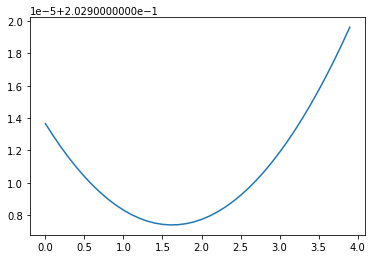

In [67]:
idx=np.asarray(range(X.shape[1]))
np.random.shuffle(idx)

X_i = X[:,idx]
y_i = y[idx].reshape(X.shape[1],1)
# _________________________________________________________
lamdbas= np.arange(0,4, 0.1)
performregs=[]
kfold=5
for ind in tqdm(range(len(lamdbas))):
    err=0.0
    la=lamdbas[ind]
    for vals in range(kfold):

        
        cvx,cvy,trx,tr_y=cv_train_split(5,vals,X_i,y_i)

        AA=np.matmul(trx,trx.T)

        BA=np.linalg.inv(AA+la*np.eye(len(AA)))
        w_r=np.matmul(BA,np.matmul(trx,tr_y))

        err+=np.mean((np.matmul(cvx.T,w_r)-cvy)**2)
        
        
    performregs.append(err)
plt.plot(lamdbas,performregs)

    
    

In [68]:
lamdbas[np.argmin(performregs)]

1.6

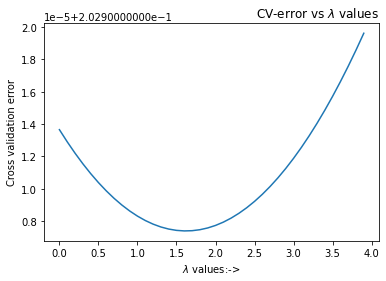

In [75]:
plt.plot(lamdbas,performregs)
plt.title(r'CV-error vs $\lambda$ values', loc='right')
plt.xlabel(r'$\lambda$ values:-> ')
plt.ylabel('Cross validation error')
plt.show()

In [81]:
# grad-reg for optimal w and lambda

def gradreg(lamdba,trx,tr_y):
    wreg=np.asarray([0. for i in range(len(trx))])
    alpha=0.02
    neta=alpha/len(y)
    nonconv=1

    while nonconv:
        wlast=wreg.copy()
        grad=neta*(2*np.dot(np.matmul(trx,trx.T),wlast)-2*np.matmul(trx,tr_y)+2*lamdba*wlast)
        wreg=wlast-grad
        if np.linalg.norm(grad)<1e-10:
            nonconv=0
    return wreg
    

In [82]:
wregd=gradreg(1.5,Xd,y)

In [77]:
yt=test[:,-1]

Xt=test[:,:-1].T


In [79]:
np.mean((np.matmul(Xt.T,w_star)-yt)**2)

0.3707273111697886

In [83]:
np.mean((np.matmul(wregd,Xt)-yt)**2)

0.37009291813224593

In [84]:
wregd13=gradreg(13.5,Xd,y)

In [85]:
np.mean((np.matmul(wregd13,Xt)-yt)**2)

0.3651464861389975

In [79]:
wregd100=gradreg(100,Xd,y)

In [80]:
np.mean((np.matmul(wregd100,Xt)-yt)**2)

0.33526834914411224